In [1]:
source("/secure/projects/HTAPP_MBC/src/init_phase2.R")
source(file.path(metaDir,"mbc_signatures_ofir.R"))
library(SingleR,verbose = FALSE, quietly=TRUE)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which, which.max, which.min


Attaching package: 'S4Vectors'

The following objects are masked from 'package:data.tab

In [2]:
sample_sheet[,h5:=paste0(dataDir,"/",sampleid,"_10x/",sampleid,"_",condition,"_",replicate,"/cellbender_out_filtered.h5"),]

In [3]:
head(sample_sheet)
nrow(sample_sheet)

Quality,Order,run status,Note,date,run_pipeline,Channel Name,sampleid,condition,replicate,Lane,Index,cancer,site,reference,chemistry,flowcell,seq_dir,mode,min_umis,min_genes,percent_mito,expected_cells,total_droplets,z_dim,z_layers,h5
<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
,1,done3,,2018_07_29,FALSE,0300630_T2_LD,HTAPP-254-SMP-571,LD,channel1,4-Jan,SI-GA-D6,breast,axillary lymph node,GRCh38_v3.0.0,threeprime,HCMKLBGX7,/tmp/fc_tmp/180720_NB501337_0482_AHCMKLBGX7,V2,0,0,60,2000,30000,200,1000,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-254-SMP-571_10x/HTAPP-254-SMP-571_LD_channel1/cellbender_out_filtered.h5
,2,done3,,2018_07_29,FALSE,0300630_T2_CDD,HTAPP-254-SMP-571,CDD,channel2,4-Jan,SI-GA-E6,breast,axillary lymph node,GRCh38_v3.0.0,threeprime,HCMKLBGX7,/tmp/fc_tmp/180720_NB501337_0482_AHCMKLBGX7,V2,0,0,60,2000,30000,200,1000,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-254-SMP-571_10x/HTAPP-254-SMP-571_CDD_channel2/cellbender_out_filtered.h5
,3,done3,,2018_07_29,FALSE,0300553_T2_1,HTAPP-806-SMP-6800,fresh,channel1,4-Jan,SI-GA-D3,breast,left breast,GRCh38_v3.0.0,threeprime,HCMKLBGX7,/tmp/fc_tmp/180720_NB501337_0482_AHCMKLBGX7,V2,0,0,60,100,10000,200,1000,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-806-SMP-6800_10x/HTAPP-806-SMP-6800_fresh_channel1/cellbender_out_filtered.h5
,4,done3,,2018_07_29,FALSE,0300553_T2_2,HTAPP-806-SMP-6800,fresh,channel2,4-Jan,SI-GA-E3,breast,left breast,GRCh38_v3.0.0,threeprime,HCMKLBGX7,/tmp/fc_tmp/180720_NB501337_0482_AHCMKLBGX7,V2,0,0,60,100,10000,200,1000,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-806-SMP-6800_10x/HTAPP-806-SMP-6800_fresh_channel2/cellbender_out_filtered.h5
,5,done3,,2018_08_29,FALSE,0300782_T1,HTAPP-285-SMP-751,fresh,channel1,2,SI-GA-A7,breast,liver,GRCh38_v3.0.0,threeprime,HLNCMCCXY,/tmp/fc_tmp/180810_SL-HXQ_0624_AFCHLNCMCCXY,V2,0,0,60,2000,30000,200,1000,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-285-SMP-751_10x/HTAPP-285-SMP-751_fresh_channel1/cellbender_out_filtered.h5
,6,done3,,2018_08_29,FALSE,0300782_T1,HTAPP-285-SMP-751,fresh,channel2,2,SI-GA-B7,breast,liver,GRCh38_v3.0.0,threeprime,HLNCMCCXY,/tmp/fc_tmp/180810_SL-HXQ_0624_AFCHLNCMCCXY,V2,0,0,60,2000,30000,200,1000,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-285-SMP-751_10x/HTAPP-285-SMP-751_fresh_channel2/cellbender_out_filtered.h5


[1] 129

In [4]:
sample_sheet[,repl:=.N,by=sampleid]

In [5]:
#sample HTAPP-285-SMP-751 has been processed twice to compare to GP 
#sofar both channel1 and channel2 samples have been processed togteher by cellBender which is not ideal
sample_sheet[repl>2]

Quality,Order,run status,Note,date,run_pipeline,Channel Name,sampleid,condition,replicate,Lane,Index,cancer,site,reference,chemistry,flowcell,seq_dir,mode,min_umis,min_genes,percent_mito,expected_cells,total_droplets,z_dim,z_layers,h5,repl
<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
,5,done3,,2018_08_29,FALSE,0300782_T1,HTAPP-285-SMP-751,fresh,channel1,2,SI-GA-A7,breast,liver,GRCh38_v3.0.0,threeprime,HLNCMCCXY,/tmp/fc_tmp/180810_SL-HXQ_0624_AFCHLNCMCCXY,V2,0,0,60,2000,30000,200,1000,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-285-SMP-751_10x/HTAPP-285-SMP-751_fresh_channel1/cellbender_out_filtered.h5,4
,6,done3,,2018_08_29,FALSE,0300782_T1,HTAPP-285-SMP-751,fresh,channel2,2,SI-GA-B7,breast,liver,GRCh38_v3.0.0,threeprime,HLNCMCCXY,/tmp/fc_tmp/180810_SL-HXQ_0624_AFCHLNCMCCXY,V2,0,0,60,2000,30000,200,1000,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-285-SMP-751_10x/HTAPP-285-SMP-751_fresh_channel2/cellbender_out_filtered.h5,4
,15,done3,,2018_09_27,FALSE,0300782_T1,HTAPP-285-SMP-751,fresh,channel1,1,SI-GA-D1,breast,liver,GRCh38_v3.0.0,threeprime,HLYYNCCXY,/tmp/fc_tmp/180901_SL-HXR_0723_AFCHLYYNCCXY,V2,0,0,60,2000,30000,200,1000,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-285-SMP-751_10x/HTAPP-285-SMP-751_fresh_channel1/cellbender_out_filtered.h5,4
,16,done3,,2018_09_27,FALSE,0300782_T1,HTAPP-285-SMP-751,fresh,channel2,1,SI-GA-E1,breast,liver,GRCh38_v3.0.0,threeprime,HLYYNCCXY,/tmp/fc_tmp/180901_SL-HXR_0723_AFCHLYYNCCXY,V2,0,0,60,2000,30000,200,1000,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-285-SMP-751_10x/HTAPP-285-SMP-751_fresh_channel2/cellbender_out_filtered.h5,4


In [6]:
#unify those replicated for now
run_table=unique(sample_sheet[,c("Channel Name","sampleid","condition","replicate","h5"),])
nrow(run_table)

[1] 127

In [7]:
#remove mixed samples
run_table=run_table[!grepl("iso",sampleid),]
nrow(run_table)

[1] 125

In [8]:
#create complete channel name
run_table[,complete_name:=paste0(sampleid,"_",condition,"_",replicate),]
head(run_table)

Channel Name,sampleid,condition,replicate,h5,complete_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0300630_T2_LD,HTAPP-254-SMP-571,LD,channel1,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-254-SMP-571_10x/HTAPP-254-SMP-571_LD_channel1/cellbender_out_filtered.h5,HTAPP-254-SMP-571_LD_channel1
0300630_T2_CDD,HTAPP-254-SMP-571,CDD,channel2,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-254-SMP-571_10x/HTAPP-254-SMP-571_CDD_channel2/cellbender_out_filtered.h5,HTAPP-254-SMP-571_CDD_channel2
0300553_T2_1,HTAPP-806-SMP-6800,fresh,channel1,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-806-SMP-6800_10x/HTAPP-806-SMP-6800_fresh_channel1/cellbender_out_filtered.h5,HTAPP-806-SMP-6800_fresh_channel1
0300553_T2_2,HTAPP-806-SMP-6800,fresh,channel2,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-806-SMP-6800_10x/HTAPP-806-SMP-6800_fresh_channel2/cellbender_out_filtered.h5,HTAPP-806-SMP-6800_fresh_channel2
0300782_T1,HTAPP-285-SMP-751,fresh,channel1,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-285-SMP-751_10x/HTAPP-285-SMP-751_fresh_channel1/cellbender_out_filtered.h5,HTAPP-285-SMP-751_fresh_channel1
0300782_T1,HTAPP-285-SMP-751,fresh,channel2,/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-285-SMP-751_10x/HTAPP-285-SMP-751_fresh_channel2/cellbender_out_filtered.h5,HTAPP-285-SMP-751_fresh_channel2


In [9]:
make_seurat=function(h5s,replicates,conditions,names,ccpm,min.features,use_complete_name=FALSE){

    if (use_complete_name == TRUE){
        stopifnot(length(conditions)==1&length(replicates)==1)
    }
    
    for(i in c(1:length(h5s))){
        print(h5s[i])
        print(names)
        print(conditions[i])
        print(replicates[i])
        cb_tmp=Read10X_h5(h5s[i])
        channel_name=paste0(names,"-",conditions[i],"-",replicates[i])
        colnames(cb_tmp)=paste0(channel_name,"_",colnames(cb_tmp))
        cond_tmp=data.frame(row.names = colnames(cb_tmp))
        cond_tmp$name=names
        cond_tmp$ccpm=ccpm[i]
        cond_tmp$condition=conditions[i]
        cond_tmp$replicate=replicates[i] 
        
        if (i>1){
            stopifnot(row.names(cb)==row.names(cb_tmp))
            cb=cbind(cb,cb_tmp)
            cond=rbind(cond,cond_tmp)
            
        }else{
            cb=cb_tmp
            cond=cond_tmp
        }
        print(dim(cb)) 
    }
    
    suppressMessages(expr = so<-make_seurat_annot(cb,min.features = min.features))
    so=AddMetaData(so,metadata = cond)
    if (use_complete_name==FALSE){
        stats_file_name=file.path(statsDir,paste0(names,"_annot_stats.tsv"))
    }else if (use_complete_name==TRUE){
        stats_file_name=file.path(statsDir,paste0(names,"_",conditions,"_",replicates,"_annot_stats.tsv"))
    }
    write.table(as.data.table(so@meta.data,keep.rownames="cellid"),stats_file_name,sep="\t",row.names=FALSE, quote=FALSE)
    return(so)
}

In [9]:
rerun=c("HTAPP-254-SMP-571","HTAPP-806-SMP-6800","HTAPP-285-SMP-751","HTAPP-309-SMP-871","HTAPP-364-SMP-1321","HTAPP-423-SMP-1741","HTAPP-425-SMP-1771","HTAPP-382-SMP-1441","HTAPP-394-SMP-1561")

In [ ]:
# n features 80
run_table[,simpleCache(cacheName = sampleid ,
                    instruction = make_seurat(h5,replicate,condition,sampleid,`Channel Name`,80),
                    cacheDir = paste0(cacheDir,"/raw"),
                    recreate=FALSE,noload=TRUE),by=sampleid]

In [10]:
# Too big (60k cells): HTAPP-231-SMP-6758 -- try n features 100 (still too much) - run separately for both channels
run_table[sampleid=="HTAPP-231-SMP-6758",simpleCache(cacheName = complete_name ,
                    instruction = make_seurat(h5,replicate,condition,sampleid,`Channel Name`,80,TRUE),
                    cacheDir = paste0(cacheDir,"/raw"),
                    recreate=FALSE,noload=TRUE),by=complete_name]

::Creating cache::	/scratch/projects/HTAPP_MBC//phase2/RCache//raw/HTAPP-231-SMP-6758_TST_channel1.RData


[1] "/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-231-SMP-6758_10x/HTAPP-231-SMP-6758_TST_channel1/cellbender_out_filtered.h5"
[1] "HTAPP-231-SMP-6758"
[1] "TST"
[1] "channel1"
[1] 33538 30000
[1] "Seurat done."


::Creating cache::	/scratch/projects/HTAPP_MBC//phase2/RCache//raw/HTAPP-231-SMP-6758_TST_channel2.RData


[1] "/scratch/projects/HTAPP_MBC//phase2/pipeline/alignreads//HTAPP-231-SMP-6758_10x/HTAPP-231-SMP-6758_TST_channel2/cellbender_out_filtered.h5"
[1] "HTAPP-231-SMP-6758"
[1] "TST"
[1] "channel2"
[1] 33538 30000
[1] "Seurat done."


complete_name
<chr>


In [21]:
rm(ret)

In [12]:
load("/scratch/projects/HTAPP_MBC/phase2/RCache//raw/HTAPP-425-SMP-1771.RData")

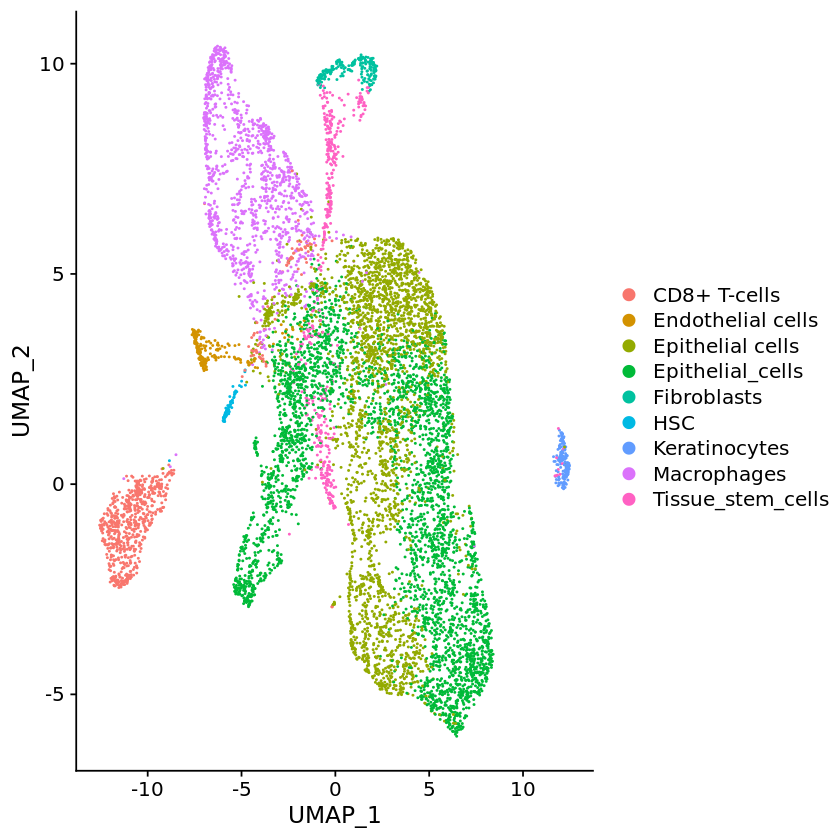

In [16]:
UMAPPlot(ret,group.by="labels_cl")

In [ ]:
RunTSNE()